# Определение неэффективных операторов

Компания **"Нупозвони"** - провайдер виртуальной телефонии. Его клиенты — колл-центры, которые: 

- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

Задача этого исследования определить критерии эффективности для операторов различных колл-центров и выявить самых неэффективных операторов.

Ссылка на презентацию: https://drive.google.com/file/d/1_P5F9p3IaJ6dFfJCvUDlsvODUQmMEiip/view?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/elizaveta.kalinichenko/viz/telecom_dashboard_16768914235870/sheet2

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Формирование-дополнительных-столбцов" data-toc-modified-id="Формирование-дополнительных-столбцов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Формирование дополнительных столбцов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-звонков" data-toc-modified-id="Количество-звонков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество звонков</a></span></li><li><span><a href="#Пропущенные-вызовы" data-toc-modified-id="Пропущенные-вызовы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пропущенные вызовы</a></span></li><li><span><a href="#Длительность-звонков" data-toc-modified-id="Длительность-звонков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Длительность звонков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Определение-неэффективных-операторов" data-toc-modified-id="Определение-неэффективных-операторов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Определение неэффективных операторов</a></span><ul class="toc-item"><li><span><a href="#Для-колл-цетров-специализирующихся-на-входящих-вызовах" data-toc-modified-id="Для-колл-цетров-специализирующихся-на-входящих-вызовах-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Для колл-цетров специализирующихся на входящих вызовах</a></span></li><li><span><a href="#Для-колл-цетров-специализирующихся-на-исходящих-вызовах" data-toc-modified-id="Для-колл-цетров-специализирующихся-на-исходящих-вызовах-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Для колл-цетров специализирующихся на исходящих вызовах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных

In [1]:
import pandas as pd
from datetime import datetime, time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth', None)
import warnings
warnings.simplefilter("ignore")
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/telecom_dataset.csv')
    clients = pd.read_csv('/datasets/telecom_clients.csv')
      
except:
    data = pd.read_csv('telecom_dataset.csv')
    clients= pd.read_csv('telecom_clients.csv')

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62


В датасете `telecom_dataset` 9 столбцов:

- `user_id` — Идентификатор клиентского аккаунта колл-центра в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)

Заметны пропуски в колонках `internal` и `operator_id`. Тип данных столбца `date` необходимо в дальнейшем заменить на дату.

In [4]:
clients.info()
clients.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Колонки в `telecom_clients.csv`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентв в сервисе

Пропусков нет, тип данных столбца `date_start`  необходимо заменим на дату.

## Предобработка данных

### Работа с пропусками

Выведем информацию о пропусках, процент содержания NaN в каждом столбце `data` общего количества строк:

In [5]:
# функция, получает на вход название столбца и возвращающает количество и процент пропущенных значений
def nan_ratio(column):
    nan = len(data[data[column].isna()])/ len(data)
    return print(f'Процент пропущенных значений в столбце {column}: {nan:.1%}, {len(data[data[column].isna()])} значений')

In [6]:
# выведем % пропусков, для всех столбцов в которых они есть:
for column in data.columns:
    if len(data[data[column].isna()]) > 0:
        nan_ratio(column)

Процент пропущенных значений в столбце internal: 0.2%, 117 значений
Процент пропущенных значений в столбце operator_id: 15.2%, 8172 значений


Мы не можем корректно заполнить отсутствующие значения с информацией о том является ли звонок внутренним звонком между операторами клиента и пропущенные индетификаторы операторов. Т.к. пропущенных значений в `internal` всего 0,2% можем удалить их. Пропусков в `operator_id` больше, но неккоректно заполненные пропуски скажутся на адекватности исследования, удаляем и их.

In [7]:
data.dropna(subset=['internal'],inplace=True)
data.dropna(subset=['operator_id'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45670 non-null  int64  
 1   date                 45670 non-null  object 
 2   direction            45670 non-null  object 
 3   internal             45670 non-null  object 
 4   operator_id          45670 non-null  float64
 5   is_missed_call       45670 non-null  bool   
 6   calls_count          45670 non-null  int64  
 7   call_duration        45670 non-null  int64  
 8   total_call_duration  45670 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.2+ MB


### Замена типов данных

Преобразуем столбцы `date` и `date_start` в datetime:

In [8]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date
clients['date_start'] = pd.to_datetime(clients['date_start'])

Столбец `operator_id` приведем к целочисленному типу:

In [9]:
data['operator_id'] = data['operator_id'].astype('int64')

### Работа с дубликатами

Проверим и удалим явные дубликаты:

In [10]:
print(f'Количество дубликатов в датасете data: {data.duplicated().sum()} значений, что составляет  {data.duplicated().sum()/len(data):.1%}, ')
print(f'Количество дубликатов в датасете clients: {clients.duplicated().sum()} значений, что составляет  {clients.duplicated().sum()/len(clients):.1%}, ')

Количество дубликатов в датасете data: 4179 значений, что составляет  9.2%, 
Количество дубликатов в датасете clients: 0 значений, что составляет  0.0%, 


Удаляем дубликаты:

In [11]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              41491 non-null  int64 
 1   date                 41491 non-null  object
 2   direction            41491 non-null  object
 3   internal             41491 non-null  object
 4   operator_id          41491 non-null  int64 
 5   is_missed_call       41491 non-null  bool  
 6   calls_count          41491 non-null  int64 
 7   call_duration        41491 non-null  int64 
 8   total_call_duration  41491 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 2.9+ MB


### Формирование дополнительных столбцов

Добавим столбец со значениями времени ожидания `wait_duration`:

In [13]:
data['wait_duration']=data['total_call_duration'] - data['call_duration']

Разделим колл-центры на две категории:
- **in** если он специализируется на обработке входящих звонков;
- **out** специализируются на обзвонах.

Добавим столбец `user_type` с соответствующими значениями.

In [14]:
#сгруппируем данные по коллцентрам и посчитаем количество входящих и исходящих вызовов
data_type=data.pivot_table(index=['user_id'], columns=['direction'], values=['calls_count'], aggfunc ='sum').droplevel(1, axis=1).reset_index()
data_type.columns=['user_id', 'in','out']
data_type.head(10)


,user_id,in,out
0,166377,102.0,4952.0
1,166391,6.0,1.0
2,166392,102.0,NaN
3,166399,11.0,NaN
4,166405,2191.0,9825.0
5,166406,161.0,8128.0
6,166407,85.0,844.0
7,166428,126.0,NaN
8,166481,1.0,NaN
9,166482,48.0,NaN


In [15]:
#функция присваивает категорию кц, в зависимости от соотношения входящих/исходящих вызовов
def user_type(data):
    if data['out']>data['in']:
        return 'out'
    else:
        return 'in' #можем так сделать, т.к. для каждого кц есть входящие вызовы, но не исходящие
    

In [16]:
#добавляем столбец с типом кц
data_type['user_type']=data_type.apply(user_type, axis=1)
#обьединяем с исходной таблицей по 'user_id'
data = pd.merge(data, data_type[['user_id','user_type']],
                       how='left', on='user_id')
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_duration,user_type
0,166377,2019-08-05,out,True,880022,True,3,0,5,5,out
1,166377,2019-08-05,out,True,880020,True,1,0,1,1,out
2,166377,2019-08-05,out,True,880020,False,1,10,18,8,out
3,166377,2019-08-05,out,False,880022,True,3,0,25,25,out
4,166377,2019-08-05,out,False,880020,False,2,3,29,26,out


### Вывод


В ходе предобработки:

- данные очищенны от пропусков в `internal` и `operator_id`;
- заменены типы данных столбцов, содержащих дату, на корректный;
- данные очищенны от дубликатов;
- добавлены столбцы с длительностью ожидания ответа на звонок и типов колл-центра в зависимости от преобладания входящих/исходящих вызовов.

## Исследовательский анализ данных

Посмотрим описательные статистики data:

In [17]:
data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration,wait_duration
count,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000,41491.000000
mean,167301.113543,916516.771155,16.921381,1010.940011,1323.153238,312.213227
std,600.513986,21234.081589,59.786187,4066.666485,4788.953155,1176.102940
min,166377.000000,879896.000000,1.000000,0.000000,0.000000,0.000000
25%,166782.000000,900790.000000,1.000000,0.000000,67.000000,19.000000
50%,167175.000000,913938.000000,4.000000,106.000000,289.000000,60.000000
75%,167827.000000,937708.000000,14.000000,772.000000,1107.000000,219.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000,46474.000000


Заметно, что в данных есть аномалии, избавимся от них.

### Количество звонков

In [18]:
data['calls_count'].describe()

count    41491.000000
mean        16.921381
std         59.786187
min          1.000000
25%          1.000000
50%          4.000000
75%         14.000000
max       4817.000000
Name: calls_count, dtype: float64

Определим функцию для построения столбчатой диаграммы, для дальнейшего упрощения визуализации:

In [19]:
# функция получает на вход данные из таблицы и строит столбчатую диаграмму
def plot_bar(data,bins,xlim, title, x_title, y_title):
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(16,6))
    sns.histplot(data, bins=bins, kde=False)
    plt.xlim(0,xlim)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

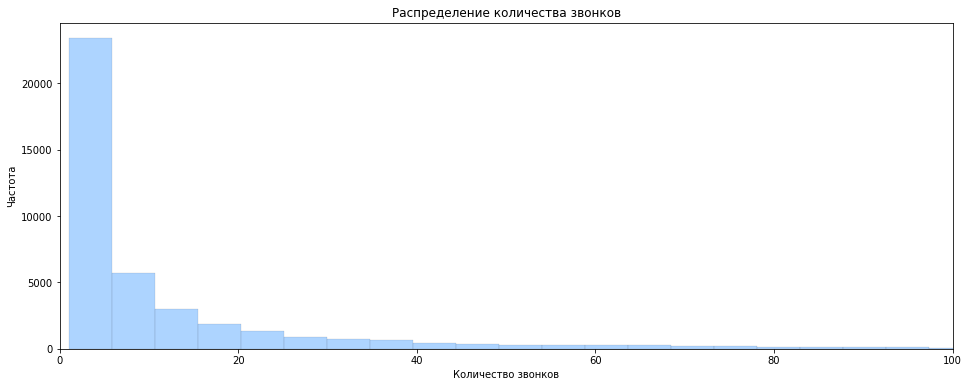

In [20]:
plot_bar(data['calls_count'], 1000, 100, 'Распределение количества звонков','Количество звонков', 'Частота')

По описательным статистикам видно, что в 75% строк количество звонков не превышает 14 вызовов. Также видно аномальный максимум - 4817 вызовов.

In [21]:
# функция получает на вход данные из таблицы и строит диаграмму размаха
def plot_box(data,y,ylim, title, y_title):
    plt.figure(figsize=(8, 8))
    ax = sns.boxplot(data=data, y=y)
    ax.set_ylim(0,ylim)
    plt.title(title, fontsize=12)
    plt.ylabel(y_title, fontsize=12)
    plt.show()

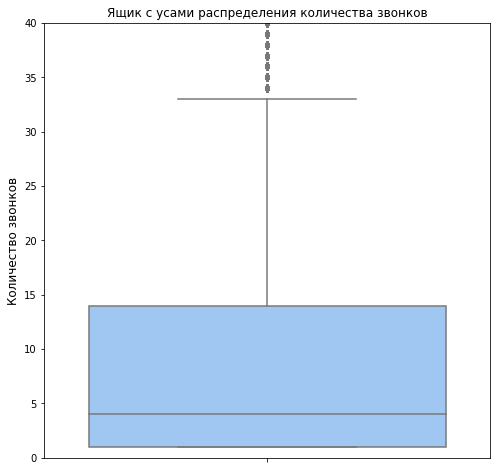

In [22]:
plot_box(data,'calls_count',40, 'Ящик с усами распределения количества звонков', 'Количество звонков')

Граница уса в 33 вызова отсекает много данных, что может быть связанно с низкой эффективностью работы операторов, поэтому некорректно брать ее за границу аномальности.

Установим верхнюю границу аномальности исходя из предположения, что максимальное эффективное время работы оператора 10 часов, в каждый из которых он может совершить до 30 вызовов.Тогда все значения столбца `calls_count` , которые превышают 300 вызовов будем считать аномальными.

При такой границе мы отсечем:

In [23]:
print('Количество аномальных значений {:.2%}'.
         format((data.shape[0] - data[data['calls_count'] <= 300].shape[0])/data.shape[0]))

Количество аномальных значений 0.60%


In [24]:
data = data.query('calls_count < 300')

In [25]:
data['calls_count'].describe()

count    41241.000000
mean        13.404015
std         24.933443
min          1.000000
25%          1.000000
50%          4.000000
75%         13.000000
max        299.000000
Name: calls_count, dtype: float64

### Пропущенные вызовы

Посмотрим на значения столбца `is_missed_call` для вызовов с ненулевой продолжительностью:

In [26]:
data.query('call_duration != 0')['is_missed_call'].value_counts()

False    27235
True       295
Name: is_missed_call, dtype: int64

И для вызовов с нулевой продолжительностью:

In [27]:
data.query('call_duration == 0')['is_missed_call'].value_counts()

True     13694
False       17
Name: is_missed_call, dtype: int64

В таблице содержится 295 записей, в которых ненулевая длительность звонков, но запись обозначена как пропущенная, а также 17 строк, в которых длительность звонков нулевая, но отмечено, что звонок не пропущен. Не будем учитывать эти строки в дальнейшем анализе:

In [28]:
data = (data[~((data['call_duration'] == 0) & (data['is_missed_call'] == False)) |
                  ((data['call_duration'] == 0) & (data['is_missed_call'] == True))])

### Длительность звонков

Посмотрим на длительность непропущенных вызовов:

In [29]:
data_not_missed = data.query('is_missed_call == False')

In [30]:
#значения в секундах приведем к минутам
(data_not_missed['call_duration']/60).describe()

count    27235.000000
mean        21.178755
std         41.267971
min          0.016667
25%          1.816667
50%          7.350000
75%         23.250000
max       1392.666667
Name: call_duration, dtype: float64

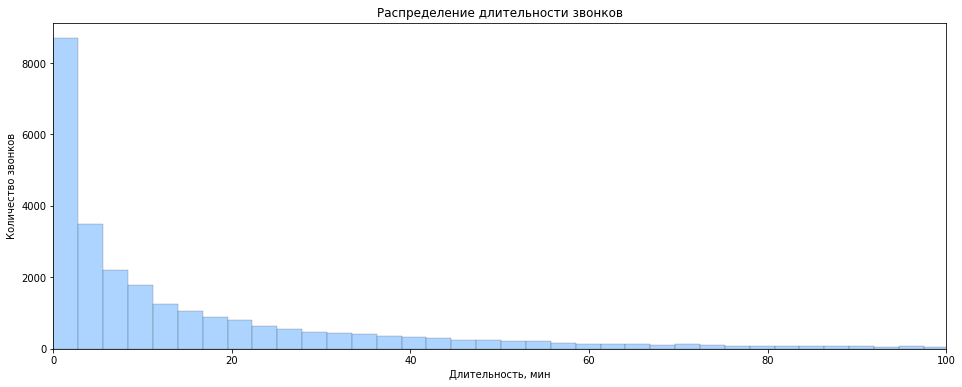

In [31]:
plot_bar(data_not_missed['call_duration']/60,500,100, 'Распределение длительности звонков', 'Длительность, мин', 'Количество звонков')


По описательным статистикам видно, что 75% звонков имеют продолжительность до 23 минут. Также видно аномальный максимум - 1393 минут (около 23 часов).

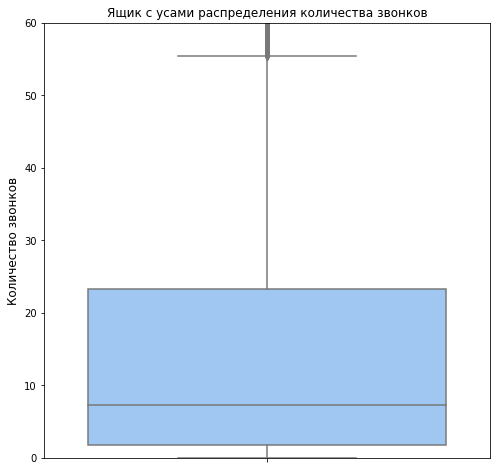

In [32]:
data_not_missed['call_duration']=data_not_missed['call_duration']/60
plot_box(data_not_missed,'call_duration',60, 'Ящик с усами распределения количества звонков', 'Количество звонков')

Граница уса в 55 минут отсекает много данных, что может быть связанно с низкой эффективностью работы операторов, поэтому некорректно брать ее за границу аномальности. 

Установим верхнюю границу аномальности исходя из предположения, что максимальное эффективное время работы оператора 10 часов.Тогда все значения столбца `call_duration` , которые превышают 36 000 секунд будем считать аномальными.

При такой границе мы отсечем:

In [33]:
print('Количество аномальных значений {:.2%}'.format((data.shape[0] - data[data['call_duration'] <= 36000].shape[0])/data.shape[0]))

Количество аномальных значений 0.02%


На графике также видно много звонков с длительностью в районе 0 секунд, исключим из дальнейшего анализа непропущенные звонки, короче 5 секунд:

In [34]:
data = data.query('call_duration <= 36000')
data = data[~((data['is_missed_call'] == False) & (data['call_duration'] < 5))]

In [35]:
data.query('is_missed_call == False')['call_duration'].describe()

count    26926.000000
mean      1268.953576
std       2269.240579
min          5.000000
25%        115.000000
50%        451.000000
75%       1411.750000
max      34934.000000
Name: call_duration, dtype: float64

### Вывод

На данном этапе данные избавленны от аномальных значений количества звонков, пропущенных вызовов и длительности звонков.

In [36]:
#выгрузим данные для дашборда
data.to_csv('telecom_data_dash.csv', sep=',')

## Определение неэффективных операторов

Определим два набора данных:

- **data_in** содержит колл-центры, которые распределяют входящие вызовы на операторов,
- **data_out** содержит колл-центры, которые совершают исходящие вызовы силами операторов.

In [37]:
data_in=data.query('user_type == "in"')
data_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7544 entries, 482 to 41481
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              7544 non-null   int64 
 1   date                 7544 non-null   object
 2   direction            7544 non-null   object
 3   internal             7544 non-null   object
 4   operator_id          7544 non-null   int64 
 5   is_missed_call       7544 non-null   bool  
 6   calls_count          7544 non-null   int64 
 7   call_duration        7544 non-null   int64 
 8   total_call_duration  7544 non-null   int64 
 9   wait_duration        7544 non-null   int64 
 10  user_type            7544 non-null   object
dtypes: bool(1), int64(6), object(4)
memory usage: 655.7+ KB


In [38]:
data_out=data.query('user_type == "out"')
data_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33371 entries, 0 to 41490
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              33371 non-null  int64 
 1   date                 33371 non-null  object
 2   direction            33371 non-null  object
 3   internal             33371 non-null  object
 4   operator_id          33371 non-null  int64 
 5   is_missed_call       33371 non-null  bool  
 6   calls_count          33371 non-null  int64 
 7   call_duration        33371 non-null  int64 
 8   total_call_duration  33371 non-null  int64 
 9   wait_duration        33371 non-null  int64 
 10  user_type            33371 non-null  object
dtypes: bool(1), int64(6), object(4)
memory usage: 2.8+ MB


### Для колл-цетров специализирующихся на входящих вызовах

In [39]:
#для анализа эффективности оставим только входящие вызовы
data_in_filtered=data_in.query('direction == "in"')

- **Определяем границу неэффективных операторов по признаку длительности времени ожидания**

In [40]:
operators_wait = data_in_filtered.pivot_table(index='operator_id', values=['wait_duration','calls_count'], aggfunc='sum').reset_index()
operators_wait['avg_wait_duration'] = (operators_wait['wait_duration']/operators_wait['calls_count']).round(2)
operators_wait.sort_values(by='avg_wait_duration')

,operator_id,calls_count,wait_duration,avg_wait_duration
194,949420,4,3,0.75
121,926872,22,17,0.77
214,952982,8,7,0.88
236,968520,5,5,1.00
212,952954,2,2,1.00
...,...,...,...,...
177,944228,29,1413,48.72
65,906076,24,1223,50.96
82,910958,12,654,54.50
38,899900,2,116,58.00


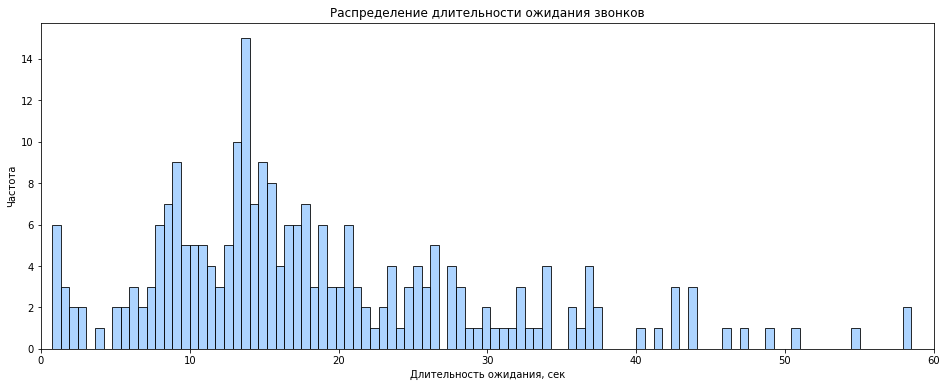

In [41]:
plot_bar(operators_wait['avg_wait_duration'], 100,60, 'Распределение длительности ожидания звонков', 'Длительность ожидания, сек', 'Частота')

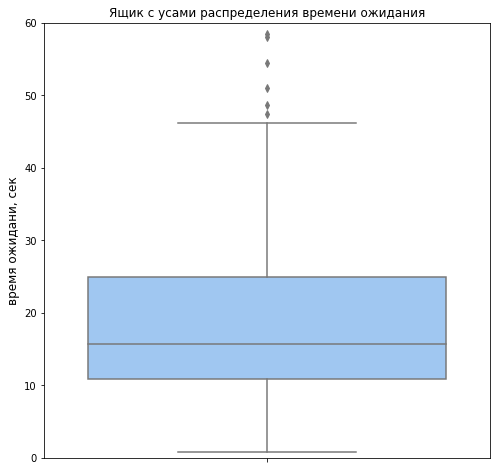

In [42]:
plot_box(operators_wait,'avg_wait_duration',60, 'Ящик с усами распределения времени ожидания', 'время ожидани, сек')

In [43]:
operators_wait['avg_wait_duration'].describe()

count    243.000000
mean      18.549547
std       11.263611
min        0.750000
25%       10.900000
50%       15.670000
75%       25.000000
max       58.500000
Name: avg_wait_duration, dtype: float64

Установим нижнюю границу времени ожидания входящего вызова в 25 секунд. Операторов с большим средним временем временем ожидания вызова отнесем к неэффективным:

In [44]:
long_wait_operators = operators_wait.query('avg_wait_duration > 25')
len(long_wait_operators)

59

Получилось 59 операторов со средним временем ожидания превышающим границу эффективности.

- **Определяем границу неэффективных операторов по признаку количество пропущенных**

Рассчитаем соотношение количества пропущеннных вызовов к рабочим дням для каждого оператора:

In [45]:
operators_missed_calls = data_in_filtered.pivot_table(index='operator_id', values=['is_missed_call','date'], aggfunc=['sum', 'count']).droplevel(1, axis=1).reset_index()
operators_missed_calls.columns=['operator_id', 'is_missed_call','date', 'count']
operators_missed_calls=operators_missed_calls.drop(columns='count')
operators_missed_calls['missed_calls_per_day'] = (operators_missed_calls['is_missed_call']*100/operators_missed_calls['date']).round(2)
operators_missed_calls.sort_values(by='missed_calls_per_day', ascending = False)

,operator_id,is_missed_call,date,missed_calls_per_day
95,913886,1,2,50.00
152,934098,2,5,40.00
97,913942,28,85,32.94
172,944216,16,51,31.37
176,944226,14,50,28.00
...,...,...,...,...
110,920874,0,19,0.00
111,920982,0,27,0.00
112,922154,0,2,0.00
113,922356,0,9,0.00


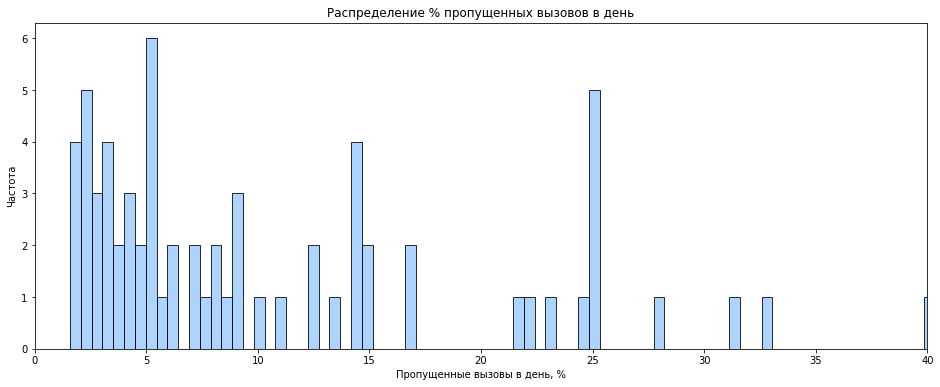

In [46]:
non_null_operators_missed_calls=operators_missed_calls[operators_missed_calls['missed_calls_per_day']!=0]
plot_bar(non_null_operators_missed_calls['missed_calls_per_day'], 100,40, 'Распределение % пропущенных вызовов в день', 'Пропущенные вызовы в день, %', 'Частота')

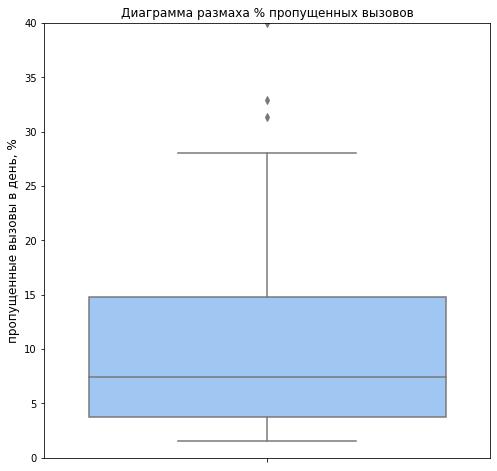

In [47]:
plot_box(non_null_operators_missed_calls,'missed_calls_per_day',40, 'Диаграмма размаха % пропущенных вызовов', 'пропущенные вызовы в день, %')

Установим нижнюю границу пропущенных вызовов в день -  15%. Операторов с процентом выше, определим неэффективными:

In [48]:
missed_calls_losers_operators = operators_missed_calls.query('missed_calls_per_day > 15')
len(missed_calls_losers_operators)

16

Получилось 16 операторов с % пропущенных вызовов в день превыщающим значение 15.

Обьеденим выявленных неэффективных операторов колл-центров специализирующихся на входящих вызовах в один датасет:

In [49]:
innefective_in=long_wait_operators.merge(missed_calls_losers_operators, on='operator_id', how='outer')
len(innefective_in['operator_id'])

68

In [50]:
len(innefective_in['operator_id'])/len(operators_missed_calls['operator_id'])

0.27983539094650206

Определили 68 операторов неэффективных по двум критериям: длительность ожидания и количество пропущенных вызовов. Что составляет 28% от всех операторов таких колл-центров.

### Для колл-цетров специализирующихся на исходящих вызовах

- **Определяем границу неэффективных операторов по признаку количество исходящих вызовов в день**

In [51]:
#для анализа эффективности оставим только исходящие вызовы
data_out_filtered=data_out.query('direction == "out"')

In [52]:
operators_calls = data_out_filtered.pivot_table(index=['date','operator_id'], values='calls_count', aggfunc='sum').reset_index()
operators_calls_pivot = operators_calls.pivot_table(index=['operator_id'], values=['date', 'calls_count'], aggfunc =['count', 'sum']).droplevel(1, axis=1).reset_index()
operators_calls_pivot.columns=['operator_id','days','count','calls']
operators_calls_pivot=operators_calls_pivot.drop(columns='count')
operators_calls_pivot['calls_per_day']=(operators_calls_pivot['calls']/operators_calls_pivot['days']).round(0)
operators_calls_pivot.sort_values('calls_per_day', ascending=False)

,operator_id,days,calls,calls_per_day
22,885890,37,10475,283.0
298,919364,21,4820,230.0
392,929428,33,7042,213.0
376,925922,10,2059,206.0
391,929426,26,4760,183.0
...,...,...,...,...
433,935956,1,1,1.0
440,937366,2,2,1.0
451,937710,1,1,1.0
452,937716,1,1,1.0


In [53]:
operators_calls_pivot['calls_per_day'].describe()

count    712.000000
mean      25.088483
std       39.445300
min        1.000000
25%        3.000000
50%        8.000000
75%       29.000000
max      283.000000
Name: calls_per_day, dtype: float64

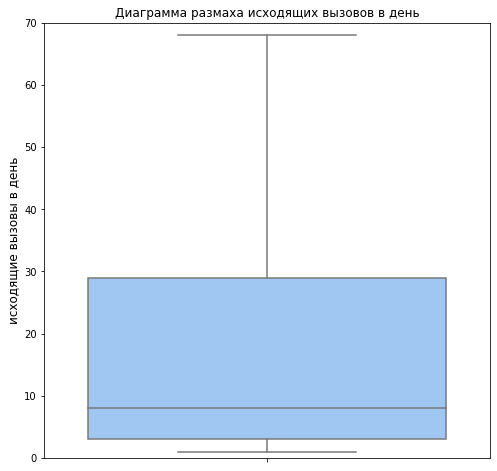

In [54]:
plot_box(operators_calls_pivot,'calls_per_day',70, 'Диаграмма размаха исходящих вызовов в день', 'исходящие вызовы в день')

Посмотрим распределение исключив операторов с количеством исходящих вызовов менее 10 в день:

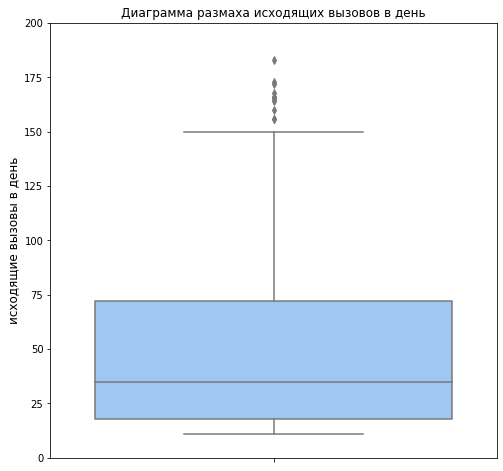

In [55]:
filtered_operators_calls_pivot=operators_calls_pivot.query('calls_per_day >10')
plot_box(filtered_operators_calls_pivot,'calls_per_day',200, 'Диаграмма размаха исходящих вызовов в день', 'исходящие вызовы в день')

In [56]:
filtered_operators_calls_pivot['calls_per_day'].describe()

count    307.000000
mean      52.840391
std       47.416014
min       11.000000
25%       18.000000
50%       35.000000
75%       72.000000
max      283.000000
Name: calls_per_day, dtype: float64

Установим нижнюю границу количества исходящих вызовов в 72 вызовов. Операторов с меньшим количеством вызовов в день определим неэффективными:

In [57]:
innefective_out = operators_calls_pivot.query('calls_per_day < 72')
len(innefective_out['operator_id'])

633

In [58]:
len(innefective_out['operator_id'])/len(operators_calls_pivot['operator_id'])

0.8890449438202247

Для колл-центров специализирующихся на исходящих вызовах неэффективными оказались 633 оператора (89%).

### Вывод

На данном этапе были установлены критерии эффективной работы для операторов и определены неэффективные операторы для колл-центров различной специализации.

## Проверка гипотез

Зададим уровень значимости и проверить следующие гипотезы
(Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам для независимых выборок):

- Среднее время ожидания у эффективных операторов при входящих вызовах отличается от среднего времени ожидания у неэффективных
- Среднее количество пропущенных входящих вызовов у эффективных операторов отличается от среднего количества пропущенных у неэффективных 
- Среднее количество исходящих вызовов у эффективных операторов отличается от среднего количества исходящих вызовов у неэффективных

В данные сгрупированные по операторам добавим столбец `effect` с признаком эффективности:

In [59]:
innefective_in.insert (loc = len(innefective_in.columns) , column='effect', value=innefective_in['operator_id'])
for i in innefective_in['effect']:
    innefective_in['effect']='ineff'

In [60]:
innefective_in_operators = innefective_in[['operator_id', 'effect']]
operators_wait=innefective_in_operators.merge(operators_wait, on='operator_id', how='outer')
operators_wait.fillna(value='eff', inplace=True)


In [61]:
operators_wait

,operator_id,effect,calls_count,wait_duration,avg_wait_duration
0,882476,ineff,2,75,37.50
1,882478,ineff,3,76,25.33
2,886892,ineff,2,58,29.00
3,888406,ineff,8,206,25.75
4,891900,ineff,32,1198,37.44
...,...,...,...,...,...
238,968520,eff,5,5,1.00
239,969294,eff,84,710,8.45
240,971100,eff,3,26,8.67
241,971102,eff,76,1352,17.79


<div style="padding:20px; font-size: 16px; ">

<b>Среднее время ожидания у эффективных операторов при входящих вызовах отличается от среднего времени ожидания у неэффективных</b>

Посмотрим на среднее время ожидания для эффективных/неэффективных операторов:

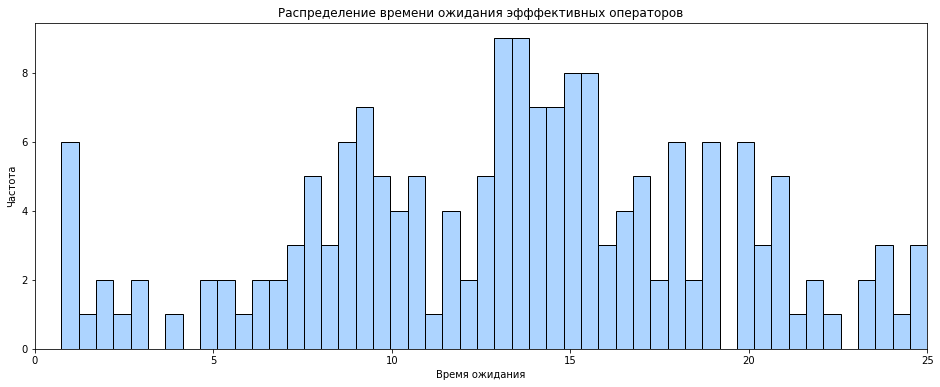

In [62]:
plot_bar(operators_wait.query('effect == "eff"')['avg_wait_duration'], 50, 25, 'Распределение времени ожидания эфффективных операторов','Время ожидания', 'Частота')

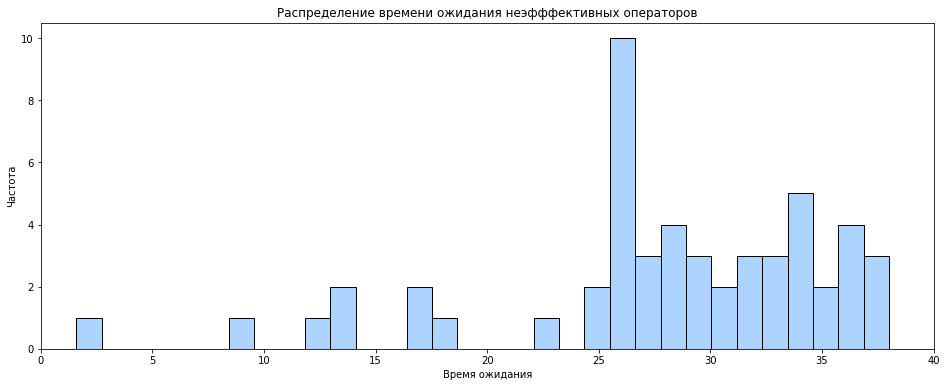

In [63]:
plot_bar(operators_wait.query('effect == "ineff"')['avg_wait_duration'], 50, 40, 'Распределение времени ожидания неэфффективных операторов','Время ожидания', 'Частота')

In [64]:
print('Среднее время ожидания для эффективных операторов:', operators_wait.query('effect == "eff"')['avg_wait_duration'].mean().round(2))
print('Среднее время ожидания для неэффективных операторов:', operators_wait.query('effect == "ineff"')['avg_wait_duration'].mean().round(2))

Среднее время ожидания для эффективных операторов: 13.32
Среднее время ожидания для неэффективных операторов: 32.01


- **Нулевая гипотеза**: Среднее время ожидания у эффективных операторов при входящих вызовах **не отличается** от среднего времени ожидания у неэффективных.

- **Альтернативная гипотеза**: Среднее время ожидания у эффективных операторов при входящих вызовах **отличается** от среднего времени ожидания у неэффективных.

Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам для независимых выборок:

In [65]:
alpha = .05 #зададим 5% уровень значимости
result = st.ttest_ind(operators_wait.query('effect == "eff"')['avg_wait_duration'], 
    operators_wait.query('effect == "ineff"')['avg_wait_duration'])

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6454204329546964e-44
Отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу, а значит вероятнее всего время ожидания для эффективных операторов отличается от времени ожидания для неефективных.

<div style="padding:20px; font-size: 16px; ">

<b>Среднее количество пропущенных входящих вызовов у эффективных операторов отличается от среднего количества пропущенных у неэффективных </b>

In [66]:
operators_missed_calls=operators_missed_calls.merge(innefective_in_operators, on='operator_id', how='outer')
operators_missed_calls.fillna(value='eff', inplace=True)
operators_missed_calls

,operator_id,is_missed_call,date,missed_calls_per_day,effect
0,882476,0,2,0.00,ineff
1,882478,0,2,0.00,ineff
2,882680,3,41,7.32,eff
3,884294,0,1,0.00,eff
4,886674,0,6,0.00,eff
...,...,...,...,...,...
238,969294,0,4,0.00,eff
239,971100,0,2,0.00,eff
240,971102,0,4,0.00,eff
241,971354,0,2,0.00,eff


In [67]:
print('Среднее количество пропущенных входящих вызовов  эффективных операторов:', operators_missed_calls.query('effect == "eff"')['missed_calls_per_day'].mean().round(2))
print('Среднее количество пропущенных входящих вызовов  неэффективных операторов:', operators_missed_calls.query('effect == "ineff"')['missed_calls_per_day'].mean().round(2))

Среднее количество пропущенных входящих вызовов  эффективных операторов: 1.29
Среднее количество пропущенных входящих вызовов  неэффективных операторов: 8.02


- **Нулевая гипотеза**: Среднее количество пропущенных входящих вызовов эффективных операторов **не отличается** от среднего количества пропущенных входящих вызовов неэффективных.

- **Альтернативная гипотеза**: Среднее количество пропущенных входящих вызовов эффективных операторов **отличается** от среднего количества пропущенных входящих вызовов неэффективных.

Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам для независимых выборок:

In [68]:
alpha = .05 #зададим 5% уровень значимости
result = st.ttest_ind(operators_missed_calls.query('effect == "eff"')['missed_calls_per_day'], 
    operators_missed_calls.query('effect == "ineff"')['missed_calls_per_day'])

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.9499587223588755e-11
Отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу, а значит вероятнее всего среднее количество пропущенных входящих вызовов эффективных операторов отличается от количества пропущенных вызовов для неефективных.

<div style="padding:20px; font-size: 16px; ">

<b>Среднее количество исходящих вызовов у эффективных операторов отличается от среднего количества исходящих вызовов у неэффективных</b>

In [69]:
innefective_out.insert (loc = len(innefective_out.columns) , column='effect', value=innefective_out['operator_id'])
for i in innefective_out['effect']:
    innefective_out['effect']='ineff'
    
innefective_out_operators = innefective_out[['operator_id', 'effect']]
operators_calls_pivot=innefective_out_operators.merge(operators_calls_pivot, on='operator_id', how='outer')
operators_calls_pivot.fillna(value='eff', inplace=True)
operators_calls_pivot

,operator_id,effect,days,calls,calls_per_day
0,879896,ineff,49,872,18.0
1,880020,ineff,7,36,5.0
2,880022,ineff,36,189,5.0
3,880026,ineff,77,2208,29.0
4,880028,ineff,78,2496,32.0
...,...,...,...,...,...
707,952466,eff,1,88,88.0
708,952468,eff,13,1127,87.0
709,958456,eff,10,842,84.0
710,961064,eff,8,904,113.0


In [70]:
print('Среднее количество исходящих вызовов  эффективных операторов:', operators_calls_pivot.query('effect == "eff"')['calls_per_day'].mean().round(2))
print('Среднее количество исходящих вызовов  неэффективных операторов:', operators_calls_pivot.query('effect == "ineff"')['calls_per_day'].mean().round(2))

Среднее количество исходящих вызовов  эффективных операторов: 122.56
Среднее количество исходящих вызовов  неэффективных операторов: 12.92


- **Нулевая гипотеза**: Среднее количество исходящих вызовов эффективных операторов **не отличается** от среднего количества пропущенных входящих вызовов неэффективных.

- **Альтернативная гипотеза**: Среднее количество исходящих вызовов эффективных операторов **отличается** от среднего количества пропущенных входящих вызовов неэффективных.

Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам для независимых выборок:

In [71]:
alpha = .05 #зададим 5% уровень значимости
result = st.ttest_ind(operators_calls_pivot.query('effect == "eff"')['calls_per_day'], 
    operators_calls_pivot.query('effect == "ineff"')['calls_per_day'])

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.2848519584721083e-224
Отвергаем нулевую гипотезу


Можем отвергнуть нулевую гипотезу, а значит вероятнее всего среднее количество исходящих вызовов эффективных операторов отличается от количества исходящих вызовов для неефективных.

## Общий вывод

Данные о колл-центрах были:
- очищенны от пропусков в internal и operator_id;
- заменены типы данных столбцов, содержащих дату, на корректный;
- очищенны от дубликатов;
- добавлены столбцы с длительностью ожидания ответа на звонок и типов колл-центра в зависимости от преобладания входящих/исходящих вызовов.

А также избавленны от аномальных значений количества звонков, пропущенных вызовов и длительности звонков.

Мы установили критерии эффективности операторов колл-центров специализирующихся на входящих вызовах:
- среднее время ожидания одного звонка не более 25 секунд
- количество пропущенных вызовов в день не более 15%
По этим критериям неэфффективными оказались 68 операторов, что составило 28% операторов таких колл-центров.

Мы установили критерии эффективности операторов колл-центров специализирующихся на исходящих вызовах:
- количество исходящих вызовов в день не менее 35
По такому критерию неэфффективными оказались 557 операторов, что составило 78% операторов таких колл-центров.

Проверка гипотез показала статистически значимые различия между средними временем ожидания, количеством пропущенных входящих и количеством исходящих вызовов для эффективных и неэффективных операторов.

Ссылка на презентацию: https://drive.google.com/file/d/1_P5F9p3IaJ6dFfJCvUDlsvODUQmMEiip/view?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/elizaveta.kalinichenko/viz/telecom_dashboard_16768914235870/sheet2